In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx =pd.read_csv("../DataSets/WeighedX.csv")
dfy =pd.read_csv("../DataSets/WeightedY.csv")

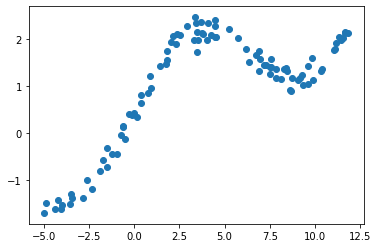

In [3]:
plt.scatter(dfx.values, dfy.values)

In [4]:
x = dfx.values
y = dfy.values

In [5]:
X= (x-x.mean())/x.std()
Y= y

[1.02986178 0.84167029]


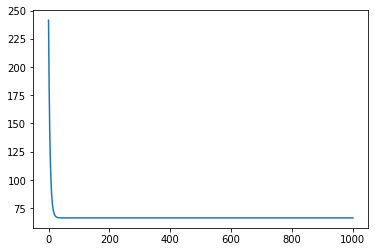

In [6]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x
def error(X,Y,theta):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx=   hypothesis(X[i], theta)     
        grad[0]+= hx - Y[i]
        grad[1] += (hx - Y[i]) * X[i]
    return grad
        
def gradientDescent(X, Y , learningRate=0.001):
    theta = np.zeros((2,))
    itr = 0
    error_list=[]
    
    while(itr<=1000):
        grad = gradient(X,Y,theta)
        e=error(X,Y,theta)
        theta[0]=theta[0] - learningRate*grad[0]
        theta[1]=theta[1] - learningRate*grad[1]
        error_list.append(e)
        itr+=1
    return theta,error_list
    
final_theta, error_list = gradientDescent(X,Y)
plt.plot(error_list)
print(final_theta)

In [7]:
xtest = np.linspace(-2,1.4,10)
print(xtest)

[-2.         -1.62222222 -1.24444444 -0.86666667 -0.48888889 -0.11111111
  0.26666667  0.64444444  1.02222222  1.4       ]


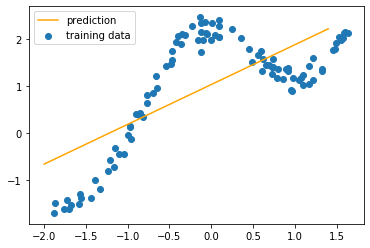

In [8]:
plt.scatter(X,Y, label="training data")
plt.plot(xtest, hypothesis(xtest,final_theta), color='orange', label='prediction')
plt.legend()
plt.show()

In [9]:
X = X.reshape((-1,))
Y = Y.reshape((-1,))
x1= X
x2 =x1**2
X =np.stack((x1,x2), axis=1)
X.shape


(99, 2)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
lr = LinearRegression(normalize = True)
lr.fit(X, Y)
output=lr.predict(X)

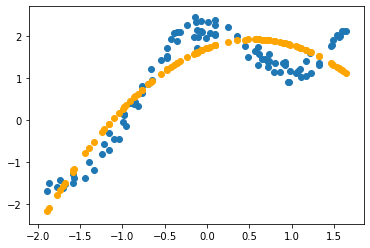

In [11]:
plt.scatter(X[:,0],Y, label="training data")
plt.scatter(X[:,0], output, label="Prediction", color='orange')

In [12]:
from sklearn.model_selection import cross_val_score

In [14]:
score = cross_val_score(lr, X, Y, cv = 10, scoring='r2')
score

array([0.62294876, 0.79959698, 0.85284663, 0.74144487, 0.71691386,
       0.75961739, 0.87728017, 0.90686166, 0.74629734, 0.65676228])

In [15]:
score.mean()

0.7680569936312532